<a href="https://colab.research.google.com/github/C0RD3LL/Omics/blob/main/Phylogenics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install(c(("DECIPHER"),("Biostrings"),("phyloseq")))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'BiocVersion', 'DECIPHER', 'Biostrings', 'phyloseq'

also installing the dependencies ‘bitops’, ‘Rhdf5lib’, ‘rhdf5filters’, ‘plogr’, ‘zlibbioc’, ‘RCurl’, ‘GenomeInfoDbData’, ‘pixmap’, ‘sp’, ‘rhdf5’, ‘iterators’, ‘permute’, ‘RSQLite’, ‘S4Vectors’, ‘IRanges’, ‘XVector’, ‘BiocGenerics’, ‘GenomeInfoDb’, ‘ade4’, ‘ape’, ‘Biobase’, ‘biomformat’, ‘foreach’, ‘igraph’, ‘multtest’, ‘plyr’, ‘reshape2’, ‘vegan’


Old packages: 'broom', 'cpp11', 'gert', 'glue', 'openssl', 'sessioninfo',
  'tibble', 'tinytex', 'uuid', 'xfun', 'nlme'



In [5]:
install.packages(c(("ggplot2"),("dplyr"),("ape")))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library("phyloseq")
library("ggplot2")
library("dplyr")
suppressMessages(library("DECIPHER"))
suppressMessages(library("Biostrings"))
suppressMessages(library("phyloseq"))
suppressMessages(library("ade4"))
suppressMessages(library("ape"))

In [9]:
#Import all Data
otu_mat<- read.table("https://raw.githubusercontent.com/pine-bio-support/Metagenomics-3/master/Acne_Amplicon_Abundance_table.txt"
        ,header = TRUE, sep = "\t")
tax_mat<- read.table("https://raw.githubusercontent.com/pine-bio-support/Metagenomics-3/master/Acne_Taxonomy_table.txt"
        ,header = TRUE, sep = "\t")
samples_df <- read.table("https://raw.githubusercontent.com/pine-bio-support/Metagenomics-3/master/Acne_SupplementaryTable.txt"
        ,header = TRUE, sep = "\t")
DNAseq <- readDNAStringSet("https://raw.githubusercontent.com/pine-bio-support/DNA-sequences/main/sample.fna")
Unknown <- read.dna(file = "https://code.omicslogic.com/resources/FD5Z", format = "fasta")


What is an otu? What is tax_mat?

In [10]:
#dist.dna computes a matrix of pairwise distances from DNA sequences using 
#a model of DNA evolution. Eleven substitution models (and the raw distance) are 
#currently available. model = "TN93" is used for this one 
Dist <- dist.dna(Unknown, model = "TN93")
#TN93 - amura and Nei (1993) developed a model which assumes distinct rates for 
#both kinds of transition (A <-> G versus C <-> T), and transversions. 
#The base frequencies are not assumed to be equal and are estimated from the data. 
#A gamma correction of the inter-site variation in substitution rates is possible.

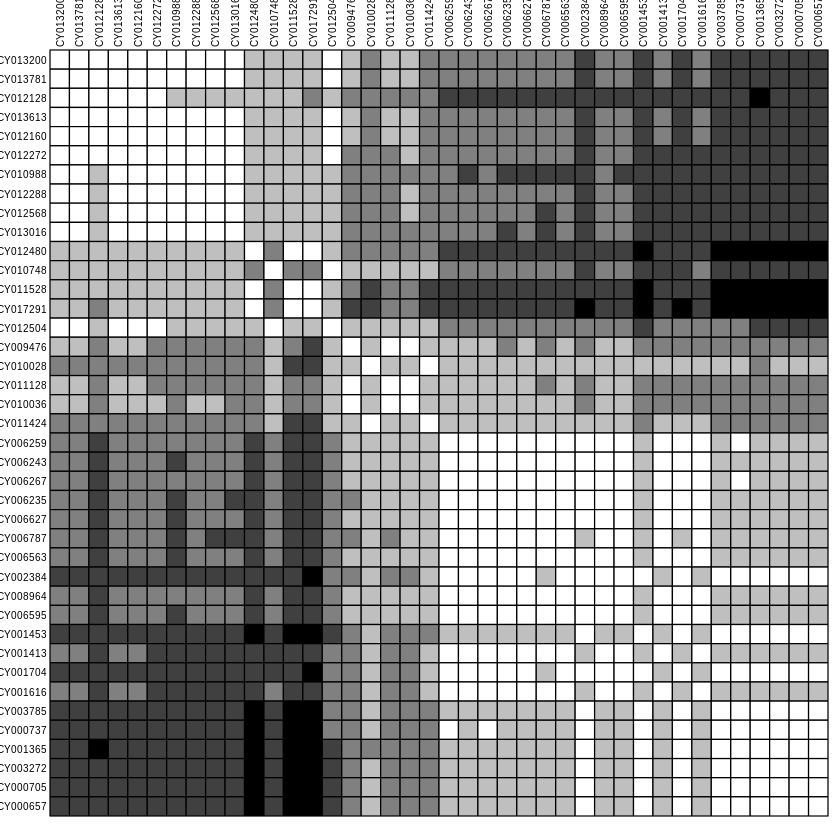

In [13]:
#conver dist into a dataframe so that it can be displayed as heat map.
Unknowndf <- as.data.frame(as.matrix(Dist))
table.paint(Unknowndf, cleg = 0, clabel.row = 0.5, clabel.col = 0.5)
# Opinion. A phylogenic tree does a beter job displaying the information here.

Get a view of the data...

In [ ]:
print(Unknown)

40 DNA sequences in binary format stored in a matrix.

All sequences of same length: 1701 

Labels:
CY013200
CY013781
CY012128
CY013613
CY012160
CY012272
...

Base composition:
    a     c     g     t 
0.333 0.201 0.227 0.239 
(Total: 68.04 kb)


In [ ]:
sample_n(otu_mat,10)
sample_n(tax_mat,10)
sample_n(samples_df,10)

OTUs,SRR11961372,SRR11961374,SRR11961376,SRR11961380,SRR11961381,SRR11961383,SRR11961389,SRR11961391,SRR11961392,⋯,SRR11961413,SRR11961425,SRR11961436,SRR11961446,SRR11961448,SRR11961452,SRR11961453,SRR11961457,SRR11961458,SRR11961459
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
OTU_1518,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
OTU_73,0,0,7,0,0,0,824,93,0,⋯,0,0,0,0,0,64,0,0,0,0
OTU_459,0,52,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
OTU_724,0,0,0,0,0,0,27,0,0,⋯,0,0,0,0,0,0,0,0,0,0
OTU_816,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
OTU_2350,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
OTU_1553,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
OTU_2341,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
OTU_33,0,17,0,262,0,122,194,1037,31,⋯,39,0,228,0,0,29,0,16,0,0


class,Kingdom,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
OTU_2160,Bacteria,Actinobacteria,Actinobacteria,Propionibacteriales,Propionibacteriaceae,Propionibacterium,NA
OTU_2228,Bacteria,Proteobacteria,Betaproteobacteria,Neisseriales,Neisseriaceae,NA,NA
OTU_838,Bacteria,Actinobacteria,Actinobacteria,Propionibacteriales,Propionibacteriaceae,Friedmanniella,NA
OTU_2168,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Albirhodobacter,NA
OTU_1378,Bacteria,Acidobacteria,Acidobacteria,Acidobacteriales,Acidobacteriaceae_(Subgroup_1),Terriglobus,NA
OTU_644,Bacteria,Proteobacteria,NA,NA,NA,NA,NA
OTU_1674,Bacteria,Firmicutes,Clostridia,Clostridiales,Family_XI,Peptoniphilus,NA
OTU_550,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,NA
OTU_688,Bacteria,Firmicutes,Bacilli,Lactobacillales,Leuconostocaceae,Leuconostoc,mesenteroides


Run,Dermatology_Disord,copy
<chr>,<chr>,<chr>
SRR11961372,none,none
SRR11961383,perioral_dermatitis,perioral_dermatitis
SRR11961391,perioral_dermatitis,perioral_dermatitis
SRR11961381,none,none
SRR11961394,perioral_dermatitis,perioral_dermatitis
SRR11961459,none,none
SRR11961458,none,none
SRR11961457,none,none
SRR11961407,perioral_dermatitis,perioral_dermatitis


In [ ]:
print(DNAseqf)

DNAStringSet object of length 1:
    width seq                                               names               
[1]    58 ATGCCGTGGTAAAGCCTTAAGAG...GCTGTACGSGCGCCCTTAACGAG Example_seq


In [ ]:
print(Dist)

             CY013200     CY013781     CY012128     CY013613     CY012160
CY013781 0.0023567414                                                    
CY012128 0.0082956403 0.0082945864                                       
CY013613 0.0023573015 0.0011769940 0.0082956403                          
CY012160 0.0023561960 0.0023554609 0.0082896464 0.0023561960             
CY012272 0.0035408074 0.0035382838 0.0094882416 0.0035408074 0.0035403274
CY010988 0.0065097947 0.0065091001 0.0124974288 0.0065097947 0.0065045888
CY012288 0.0041326822 0.0041305571 0.0100890703 0.0041326822 0.0041309981
CY012568 0.0047261662 0.0047244418 0.0106915574 0.0047261662 0.0047232714
CY013016 0.0059149707 0.0059126609 0.0118939924 0.0059149707 0.0059111735
CY012480 0.0118778101 0.0118746110 0.0179147136 0.0118778101 0.0118717890
CY010748 0.0130945421 0.0130897092 0.0179258684 0.0130945421 0.0130864036
CY011528 0.0130704352 0.0130676803 0.0191156589 0.0130704352 0.0130646749
CY017291 0.0142754718 0.0142721199 0.0